## Session prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the data
df = pd.read_csv("survey_results_public.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
df.shape

(88883, 85)

# Data Understanding: How many participants are DA/BA or DS?

In [4]:
#How participants describe their current jobs
df["DevType"].unique()

array([nan,
       'Developer, desktop or enterprise applications;Developer, front-end',
       'Designer;Developer, back-end;Developer, front-end;Developer, full-stack',
       ...,
       'Developer, full-stack;Developer, game or graphics;Developer, mobile;Marketing or sales professional;Product manager',
       'Data or business analyst;Data scientist or machine learning specialist;Developer, full-stack;DevOps specialist;Engineer, data;Engineer, site reliability;Student',
       'Developer, QA or test;Student;System administrator'], dtype=object)

It seems that a person can take multiple roles in their current jobs. Therefore, a data analyst or data scientist refers to the partipant who includes as least one of these two choices in the answer.

In [5]:
#The proportion of participants who is a data analyst or data scientist
df["DevType"].apply(lambda x: "Data or business analyst" in str(x) or "Data scientist or machine learning specialist" in str(x)).mean()

0.1201017067380714

# Data preparation

In [6]:
#use two columns to specify the data analysts and data scientists
df["Is_DAorBA"] = df["DevType"].apply(lambda x: 1 if "Data or business analyst" in str(x) else 0)
df["Is_DS"] = df["DevType"].apply(lambda x: 1 if "Data scientist or machine learning specialist" in str(x) else 0)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,Is_DAorBA,Is_DS
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,0,0
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,0,0
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult,0,0
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,0,0
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy,0,0


In [7]:
#The number of data analysts and data scientists in this dataset
print(df[df["Is_DAorBA"] == 1].shape)
print(df[df["Is_DS"] == 1].shape)

(6294, 87)
(6460, 87)


In [8]:
#df only includes those who are current "data or business analyst" or "data scientist or machine learning specialist"
df = df.loc[(df.Is_DAorBA == 1) | (df.Is_DS == 1)]

# The analysis

## 1. What are the education backgrounds of these data analysts and data scientists?

In [9]:
#the educational levels to choose from
df["EdLevel"].unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree', 'Other doctoral degree (Ph.D, Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school',
       nan, 'I never completed any formal education'], dtype=object)

### Data or business analysts

In [10]:
#Education level of data/ business analysts
df[df["Is_DAorBA"] == 1]["EdLevel"].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              2680
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           1780
Some college/university study without earning a degree                                 673
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     320
Other doctoral degree (Ph.D, Ed.D., etc.)                                              266
Associate degree                                                                       224
Professional degree (JD, MD, etc.)                                                     121
Primary/elementary school                                                               56
I never completed any formal education                                                  51
Name: EdLevel, dtype: int64

In [11]:
#Undergraduate major of data/ business analysts
df[df["Is_DAorBA"] == 1]["UndergradMajor"].value_counts()

Computer science, computer engineering, or software engineering          2728
Information systems, information technology, or system administration     539
Another engineering discipline (ex. civil, electrical, mechanical)        493
Mathematics or statistics                                                 453
A business discipline (ex. accounting, finance, marketing)                392
A natural science (ex. biology, chemistry, physics)                       358
A social science (ex. anthropology, psychology, political science)        223
Web development or web design                                             169
A humanities discipline (ex. literature, history, philosophy)             123
Fine arts or performing arts (ex. graphic design, music, studio art)       71
I never declared a major                                                   64
A health science (ex. nursing, pharmacy, radiology)                        33
Name: UndergradMajor, dtype: int64

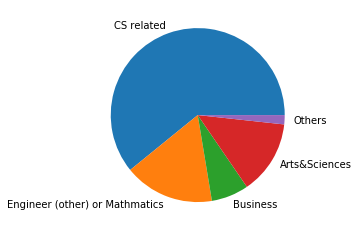

In [12]:
#visualize the result
pie_da = {}
pie_da["CS related"] = 2728+539+169
pie_da["Engineer (other) or Mathmatics"] = 493+453
pie_da["Business"] = 392
pie_da["Arts&Sciences"] = 358+223+123+71
pie_da["Others"] = 64+33

plt.pie(pie_da.values(), labels = pie_da.keys())
plt.show()

### Data scientist or machine learning specialist

In [13]:
#Education level of data scentists
df[df["Is_DS"] == 1]["EdLevel"].value_counts()

Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           2301
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              2261
Other doctoral degree (Ph.D, Ed.D., etc.)                                              780
Some college/university study without earning a degree                                 421
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     336
Associate degree                                                                       102
Professional degree (JD, MD, etc.)                                                      74
Primary/elementary school                                                               62
I never completed any formal education                                                  34
Name: EdLevel, dtype: int64

In [14]:
#Undergraduate major of data scentists
df[df["Is_DS"] == 1]["UndergradMajor"].value_counts()

Computer science, computer engineering, or software engineering          3066
Mathematics or statistics                                                 749
A natural science (ex. biology, chemistry, physics)                       671
Another engineering discipline (ex. civil, electrical, mechanical)        558
Information systems, information technology, or system administration     233
A social science (ex. anthropology, psychology, political science)        169
A business discipline (ex. accounting, finance, marketing)                151
A humanities discipline (ex. literature, history, philosophy)              82
Web development or web design                                              57
Fine arts or performing arts (ex. graphic design, music, studio art)       36
A health science (ex. nursing, pharmacy, radiology)                        36
I never declared a major                                                   22
Name: UndergradMajor, dtype: int64

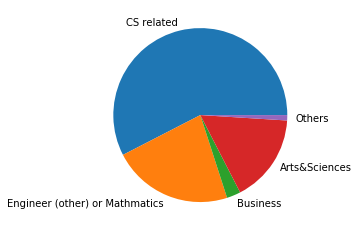

In [15]:
#visualize the result
pie_ds = {}
pie_ds["CS related"] = 3066+233+57
pie_ds["Engineer (other) or Mathmatics"] = 749+558
pie_ds["Business"] = 151
pie_ds["Arts&Sciences"] = 671+169+82+36
pie_ds["Others"] = 36+22
plt.pie(pie_ds.values(), labels = pie_ds.keys())
plt.show()

Text(0.5, 1.0, 'Data Scentists')

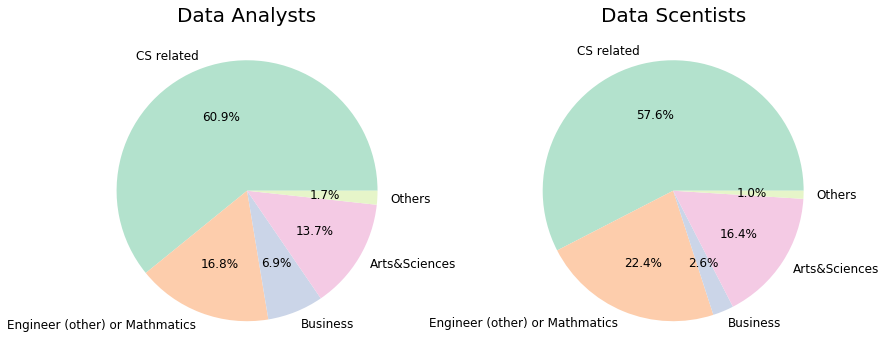

In [16]:
#plot two pie charts together
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(14,6))

cmap = plt.get_cmap('Pastel2')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

ax0.pie(pie_da.values(), labels = pie_da.keys(), autopct='%1.1f%%', startangle=0, colors=colors, textprops={'fontsize': 12})
ax0.set_title("Data Analysts", fontsize=20)
ax1.pie(pie_ds.values(), labels = pie_ds.keys(), autopct='%1.1f%%', startangle=0, colors=colors, textprops={'fontsize': 12})
ax1.set_title("Data Scentists", fontsize=20)

## 2. For those who studied business, what help them to become a data analyst or data scientist?

In [17]:
#only include those who had a business major
df_subset = df[df["UndergradMajor"] == "A business discipline (ex. accounting, finance, marketing)"]

In [18]:
#A person can include multiple choices in an answer.
#Split the answers and count the unique choices:
edu_counts = {}
for index, row in df_subset.iterrows():
    if type(row["EduOther"]) == str:
        for i in row["EduOther"].split(";"):
            if i in edu_counts.keys():
                edu_counts[i] += 1
            else:
                edu_counts[i] = 1
edu_counts

{'Taken an online course in programming or software development (e.g. a MOOC)': 319,
 'Completed an industry certification program (e.g. MCPD)': 63,
 'Received on-the-job training in software development': 140,
 'Taught yourself a new language, framework, or tool without taking a formal course': 372,
 'Taken a part-time in-person course in programming or software development': 95,
 'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)': 70,
 'Participated in a full-time developer training program or bootcamp': 67,
 'Participated in a hackathon': 60,
 'Contributed to open source software': 110}

([<matplotlib.axis.YTick at 0x1a24061e808>,
 <a list of 9 Text yticklabel objects>)

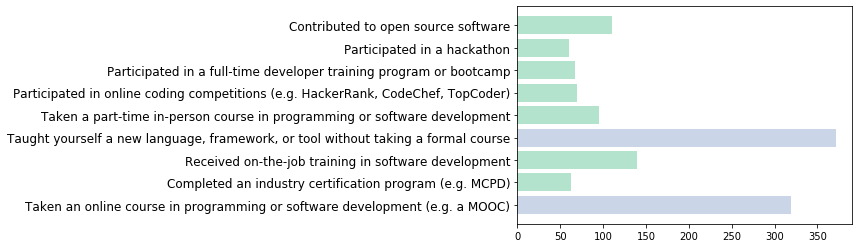

In [19]:
#visual the result
plt.barh(range(len(edu_counts)), list(edu_counts.values()), align='center', color=[cmap(2)]+[cmap(0)]*2+[cmap(2)]+[cmap(0)]*5)
plt.yticks(range(len(edu_counts)), list(edu_counts.keys()), fontsize = 12)

## 3. What technologies do data analysts or data scientists prefer in their companies?

In [20]:
def count_answers(df, col_name):
    '''
    For some questions, people can choose more than one answer.
    This function will count the each unique answer from a row in a certain column.
    input: df - the dataframe, col_name - the column that has more than one answer in a row
    output: a dictionary counts the number of different answers (sorted desc)
    '''
    col_d = {}
    for index, row in df.iterrows():
        if type(row[col_name]) == str:
            for i in row[col_name].split(";"):
                if i in col_d.keys():
                    col_d[i] += 1
                else:
                    col_d[i] = 1
    return sorted(col_d.items(), key=lambda x: x[1], reverse=True)

In [21]:
#count the answers to the question "programming language that you desire to use the next year"
count_answers(df, "LanguageDesireNextYear")

[('Python', 6995),
 ('SQL', 5299),
 ('JavaScript', 4599),
 ('HTML/CSS', 3864),
 ('Bash/Shell/PowerShell', 3116),
 ('R', 2647),
 ('C#', 2478),
 ('Java', 2444),
 ('C++', 2264),
 ('TypeScript', 1951),
 ('Go', 1843),
 ('C', 1381),
 ('PHP', 1337),
 ('Other(s):', 1282),
 ('Scala', 1241),
 ('Rust', 1156),
 ('Kotlin', 1117),
 ('WebAssembly', 823),
 ('Swift', 822),
 ('Ruby', 726),
 ('Assembly', 561),
 ('VBA', 545),
 ('Dart', 440),
 ('F#', 437),
 ('Clojure', 368),
 ('Objective-C', 357),
 ('Elixir', 333),
 ('Erlang', 297)]

In [22]:
#count the answers to the question "database that you desire to use the next year"
count_answers(df, "DatabaseDesireNextYear")

[('PostgreSQL', 3678),
 ('MySQL', 3366),
 ('MongoDB', 3002),
 ('Microsoft SQL Server', 2633),
 ('SQLite', 2555),
 ('Elasticsearch', 2052),
 ('Redis', 1905),
 ('Oracle', 1287),
 ('MariaDB', 1284),
 ('Firebase', 1247),
 ('Cassandra', 1015),
 ('Other(s):', 859),
 ('DynamoDB', 810),
 ('Couchbase', 373)]

In [23]:
#count the answers to the question "frameworks, libraries, and tools that you desire to use the next year"
count_answers(df, "MiscTechDesireNextYear")

[('TensorFlow', 4406),
 ('Pandas', 3646),
 ('Node.js', 3172),
 ('Torch/PyTorch', 2424),
 ('Apache Spark', 2152),
 ('.NET', 1910),
 ('Hadoop', 1872),
 ('.NET Core', 1813),
 ('React Native', 1371),
 ('Unity 3D', 1213),
 ('Xamarin', 768),
 ('Ansible', 744),
 ('Unreal Engine', 738),
 ('Flutter', 695),
 ('Other(s):', 537),
 ('Cordova', 448),
 ('Chef', 300),
 ('Puppet', 294),
 ('CryEngine', 202)]

In [24]:
#count the answers to the question "development environment that you use regularly"
count_answers(df, "DevEnviron")

[('Visual Studio Code', 4581),
 ('Notepad++', 3762),
 ('IPython / Jupyter', 3522),
 ('Visual Studio', 3256),
 ('Vim', 2857),
 ('Sublime Text', 2695),
 ('PyCharm', 2609),
 ('IntelliJ', 2341),
 ('RStudio', 1785),
 ('Atom', 1716),
 ('Eclipse', 1650),
 ('Android Studio', 1496),
 ('Xcode', 804),
 ('NetBeans', 737),
 ('PHPStorm', 637),
 ('Emacs', 632),
 ('Coda', 182),
 ('RubyMine', 149),
 ('TextMate', 148),
 ('Komodo', 110),
 ('Zend', 98),
 ('Light Table', 68)]

## 4. What kinds of interview would be like?

In [25]:
count_answers(df, "LastInt")

[('Interview with people in senior / management roles', 7062),
 ('Interview with people in peer roles', 5190),
 ('Write any code', 2861),
 ('Write code by hand (e.g., on a whiteboard)', 2083),
 ('Complete a take-home project', 1937),
 ('Solve a brain-teaser style puzzle', 1918)]

## 5. What factors do these data analysts and data scientists care the most when choosing jobs?

In [26]:
#organization size for both roles
df["OrgSize"].value_counts()

20 to 99 employees                                    1630
10,000 or more employees                              1515
100 to 499 employees                                  1444
2-9 employees                                         1038
1,000 to 4,999 employees                              1026
10 to 19 employees                                     832
Just me - I am a freelancer, sole proprietor, etc.     689
500 to 999 employees                                   568
5,000 to 9,999 employees                               482
Name: OrgSize, dtype: int64

In [27]:
#organization size for data analysts
df[df["Is_DAorBA"] == 1]["OrgSize"].value_counts()

20 to 99 employees                                    982
100 to 499 employees                                  892
10,000 or more employees                              841
2-9 employees                                         631
1,000 to 4,999 employees                              599
Just me - I am a freelancer, sole proprietor, etc.    481
10 to 19 employees                                    477
500 to 999 employees                                  363
5,000 to 9,999 employees                              295
Name: OrgSize, dtype: int64

In [28]:
#organization size for data scientists
df[df["Is_DS"] == 1]["OrgSize"].value_counts()

10,000 or more employees                              975
20 to 99 employees                                    944
100 to 499 employees                                  818
1,000 to 4,999 employees                              613
2-9 employees                                         597
10 to 19 employees                                    501
Just me - I am a freelancer, sole proprietor, etc.    372
500 to 999 employees                                  317
5,000 to 9,999 employees                              288
Name: OrgSize, dtype: int64

In [29]:
#job factors to consider
df["JobFactors"].value_counts()

Languages, frameworks, and other technologies I'd be working with;Remote work options;Flex time or a flexible schedule                                472
Office environment or company culture;Opportunities for professional development;Flex time or a flexible schedule                                     468
Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Opportunities for professional development    462
Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Flex time or a flexible schedule              415
Office environment or company culture;Opportunities for professional development;How widely used or impactful my work output would be                 353
                                                                                                                                                     ... 
Office environment or company culture;Diversity of the company or organizati

In [30]:
#count the unique answers
count_answers(df, "JobFactors")

[('Office environment or company culture', 4597),
 ('Opportunities for professional development', 4593),
 ("Languages, frameworks, and other technologies I'd be working with", 4534),
 ('Flex time or a flexible schedule', 4398),
 ('Remote work options', 3044),
 ('How widely used or impactful my work output would be', 3006),
 ("Industry that I'd be working in", 1789),
 ("Specific department or team I'd be working on", 1596),
 ('Financial performance or funding status of the company or organization',
  1501),
 ('Diversity of the company or organization', 757)]